In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import models
import utils
import main

%load_ext autoreload
%autoreload 

logger = models.logger
logger(".")

2025-04-02 16:42:22 | .


## Accuracy matrix
---

2025-04-02 16:42:42 | Saved sessions:


[0] ae_7
[1] ae_9
[2] ae_8
[3] ae_6
[4] ae_20_1341
[5] ae_3
[6] ae_4
[7] ae_19_1731
[8] ae_5
[9] ae_20_1332


Select session
>>>  0


2025-04-02 16:42:46 | bias=False
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.98it/s]


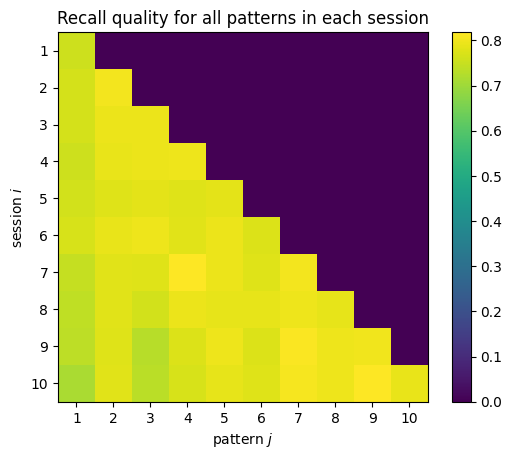

In [4]:
num_samples = 10
out, model, data = utils.train_for_accuracy_lec(alpha=0.4, num_rep=10,
                                            num_samples=num_samples, idx=-1)
""" plot """
fig1 = plt.figure()
plt.imshow(out.mean(axis=0), vmin=0)
plt.title(f"Recall quality for all patterns in each session")
plt.xlabel("pattern $j$")
plt.ylabel("session $i$")
plt.xticks(range(num_samples), range(1, num_samples+1))
plt.yticks(range(num_samples), range(1, num_samples+1))
plt.colorbar()
plt.show()

In [5]:
num_samples = 100
out, model, data = utils.train_for_accuracy(alpha=0.2, num_rep=200,
                                            num_samples=num_samples, idx=1,
                                            verbose=True)

2025-04-02 16:42:52 | Pre-selected session: [1]
2025-04-02 16:42:52 | bias not found in the info file, set to True
2025-04-02 16:42:52 | bias=True
/Users/daniekru/Research/lab/KAMemory/src/models.py:428: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please op

{'K': 5,
 'K_lat': 18,
 'beta': 54,
 'date': '02/04/2025 16:15:28',
 'dim_ca1': 50,
 'dim_ca3': 50,
 'dim_ei': 50,
 'dim_eo': 50,
 'epochs': 2000,
 'loss_ae': 0.05364,
 'num_samples': 20000}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [04:07<00:00,  1.24s/it]


In [214]:
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

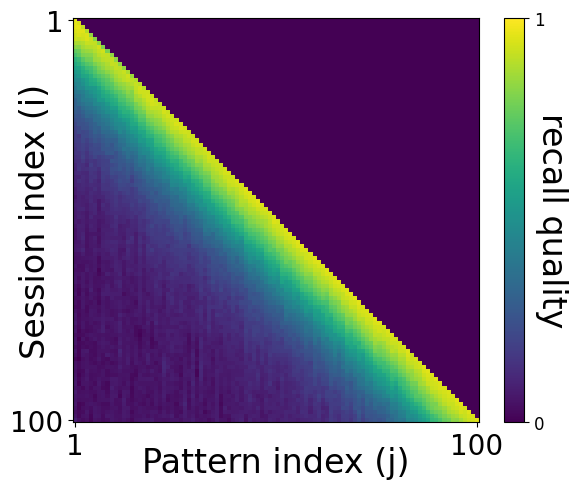

In [13]:
""" settings """
labsize = 24
titlesize = 34
ticksize = 20

# Create the figure with better proportions
fig_w3, ax = plt.subplots(figsize=(6, 5))

# Plot the data with viridis colormap
im = ax.imshow(out.mean(axis=0), cmap='viridis', vmin=0, vmax=1., aspect='auto')

# Add a more descriptive and cleaner colorbar
cbar = fig_w3.colorbar(im, ax=ax, ticks=[0, 1.])
cbar.set_label("recall quality", fontsize=labsize, labelpad=17, rotation=-90)
cbar.ax.tick_params(labelsize=12)

# Improve axes labels
ax.set_ylabel("Session index (i)", fontsize=labsize, labelpad=-30)
ax.set_xlabel("Pattern index (j)", fontsize=labsize, labelpad=-10)

# Improve ticks - more intermediate ticks for better reference
ax.set_xticks([0, 99])
ax.set_yticks([0, 99])
ax.set_xticklabels([1, 100], fontsize=ticksize)
ax.set_yticklabels([1, 100], fontsize=ticksize)

# Add grid for better readability
ax.grid(False)  # Remove default grid

# Enhance the overall layout
plt.tight_layout()
plt.show()

## Reconstruction
---

In [18]:
""" settings """
labsize = 24
titlesize = 34
ticksize = 24

2025-04-02 00:03:17 | using LEC data
2025-04-02 00:03:17 | bias=False
/Users/daniekru/Research/lab/KAMemory/src/models.py:428: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

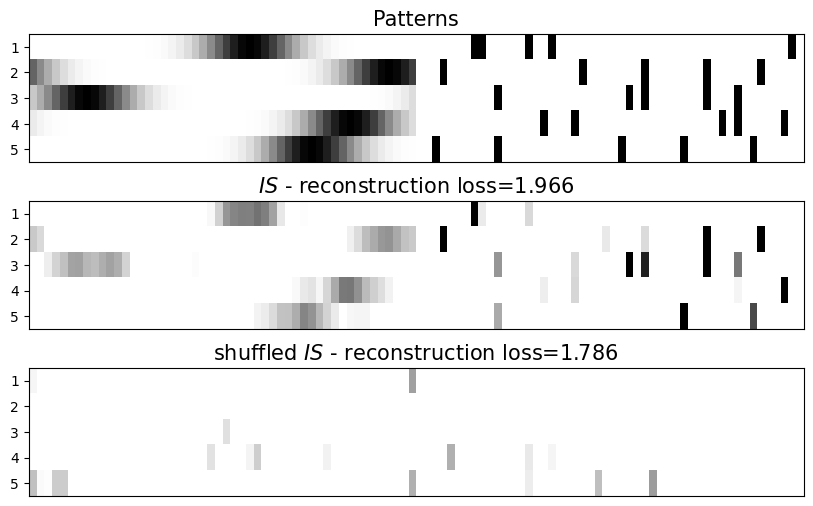

In [184]:
np.random.seed(12)

results = utils.train_for_reconstruction(alpha=0.1, num_samples=5, verbose=False, bias=True, use_lec=True, idx=0,
                                         binarize=0)

""" plot """
fig_d, (ax12, ax22, ax32) = plt.subplots(3, 1,
                                figsize=(10, 6), sharex=True)

plt.subplots_adjust(hspace=0.3)

is_squash = False

utils.plot_squashed_data(data=results["data"],
                         ax=ax12,
                         title="Patterns",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl_rnd"], ax=ax32,
                         title=f"shuffled $IS$ - " + \
                f"reconstruction loss={results['rec_loss_rnd']:.3f}",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl"], ax=ax22,
                         title=f"$IS$ - " + \
                f"reconstruction loss={results['rec_loss']:.3f}",
                         proper_title=True)

plt.show()

### ---

In [136]:
def plot_squashed_data(data: np.ndarray, title: str="",
                       ax: plt.Axes=None, squash: bool=False,
                       proper_title: bool=False):

    """
    This function plots the squashed data

    Parameters
    ----------
    data : np.ndarray
        squashed data
    title : str, optional
        title of the plot, by default ""
    ax : plt.Axes, optional
        axis of the plot, by default None
    """

    if squash:
        data = data.sum(axis=0).reshape(1, -1)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    ax.imshow(data, aspect="auto", cmap="gray_r", vmin=0, vmax=1, interpolation="nearest")
    if proper_title:
        ax.set_title(title, fontsize=15)
    else:
        ax.set_ylabel(title, fontsize=labsize)
    ax.set_yticks(range(len(data)), range(1, 1+len(data)))
    #ax.set_yticks(range(len(data)), ())
    ax.yaxis.tick_right()

    ax.set_xticks([])

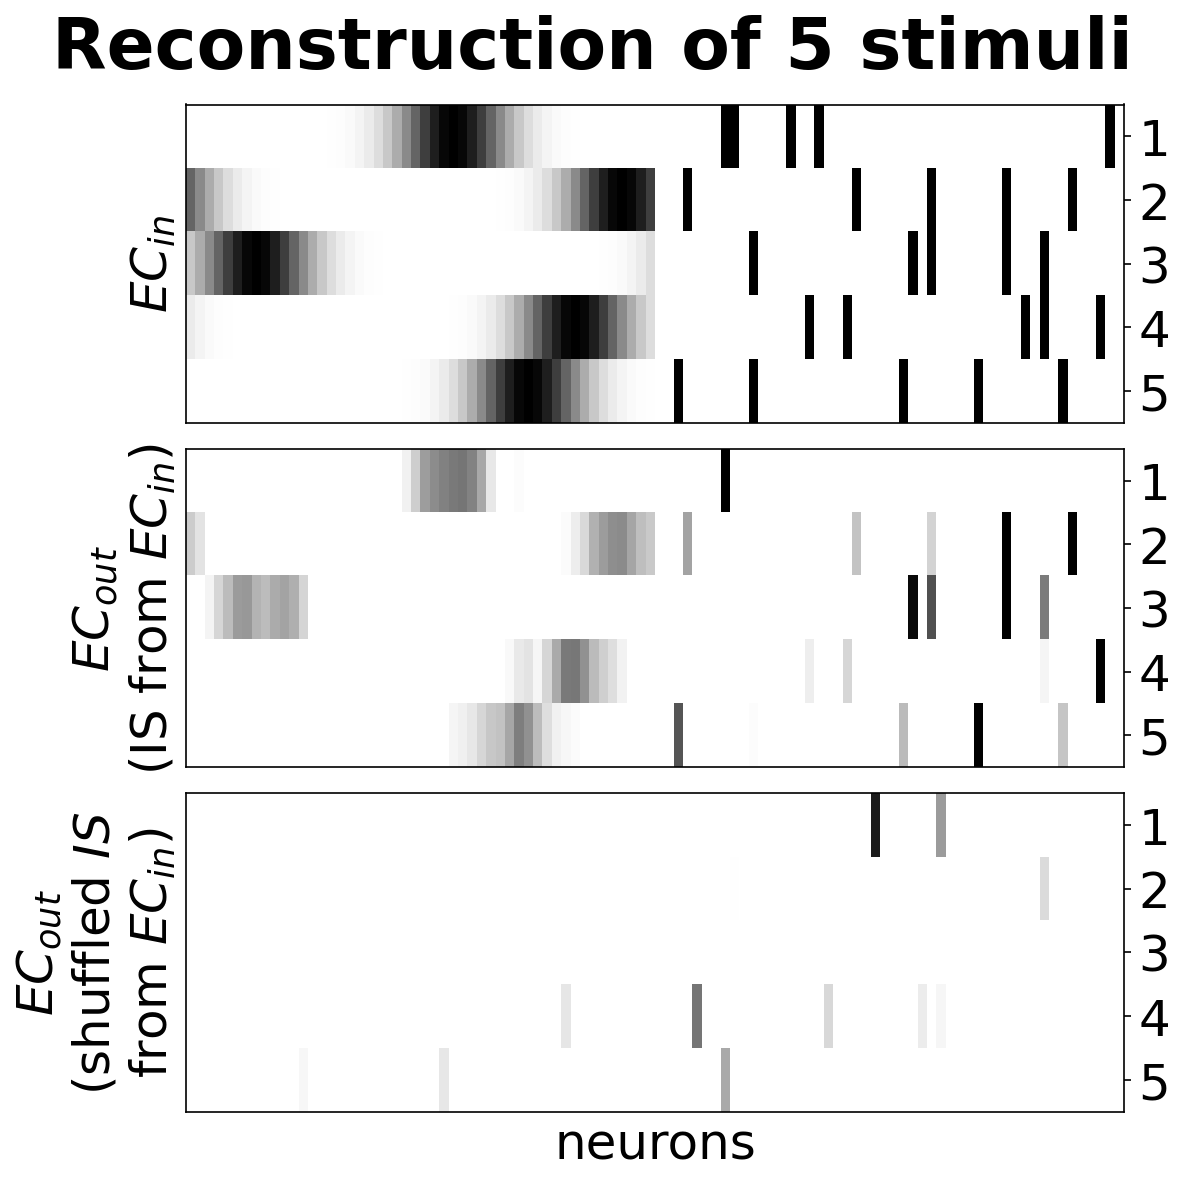

In [22]:
fig_d, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8), sharex=True, dpi=150)
plt.subplots_adjust(hspace=0.3)

# Plot for Patterns
plot_squashed_data(data=results["data"], ax=ax1, title="$EC_{{in}}$",
                         proper_title=False)


# Plot for IS
plot_squashed_data(data=results["out_mtl"], ax=ax2,
                         title="$EC_{{out}}$\n(IS from $EC_{in}$)",
                         proper_title=False)

# Plot for shuffled IS
plot_squashed_data(data=results["out_mtl_rnd"], ax=ax3,
                         title="$EC_{out}$\n(shuffled $IS$\nfrom $EC_{in}$)",
                         proper_title=False)

# Adjust font sizes
for ax in (ax1, ax2, ax3):
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    #ax.tick_params(axis='both', which='minor', labelsize=20)

# Add a common x-label
#fig_d.text(0.5, 0.0, 'neurons', ha='center', fontsize=15)

# labels & title
fig_d.suptitle("Reconstruction of 5 stimuli", fontsize=titlesize, fontweight="bold")
ax3.set_xlabel("neurons", fontsize=labsize)

plt.tight_layout()
plt.show()

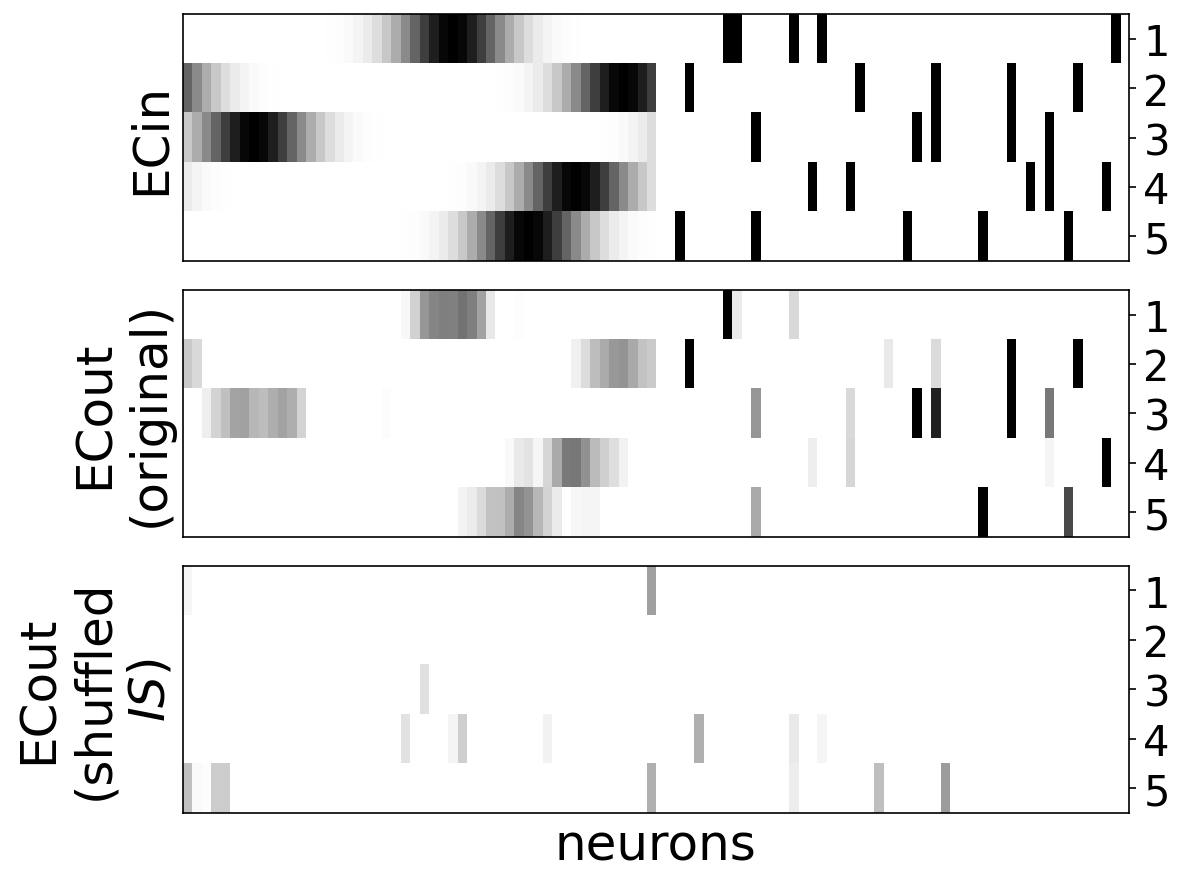

In [262]:
""" plot """
fig_w, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True, dpi=150)
plt.subplots_adjust(hspace=0.3)

# Plot for Patterns1


plot_squashed_data(data=results["data"], ax=ax1, title="ECin",
                         proper_title=False)


# Plot for IS
plot_squashed_data(data=results["out_mtl"], ax=ax2,
                         title="ECout\n(original)",
                         proper_title=False)

# Plot for shuffled IS
plot_squashed_data(data=results["out_mtl_rnd"], ax=ax3,
                         title="ECout\n(shuffled\n$IS$)",
                         proper_title=False)

# Adjust font sizes
for ax in (ax1, ax2, ax3):
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    #ax.tick_params(axis='both', which='minor', labelsize=20)

# Add a common x-label
#fig_d.text(0.5, 0.0, 'neurons', ha='center', fontsize=15)

# labels & title
#fig_d.suptitle("Stimuli reconstruction", fontsize=titlesize, fontweight="bold")
ax3.set_xlabel("neurons", fontsize=labsize)

plt.tight_layout()
plt.show()

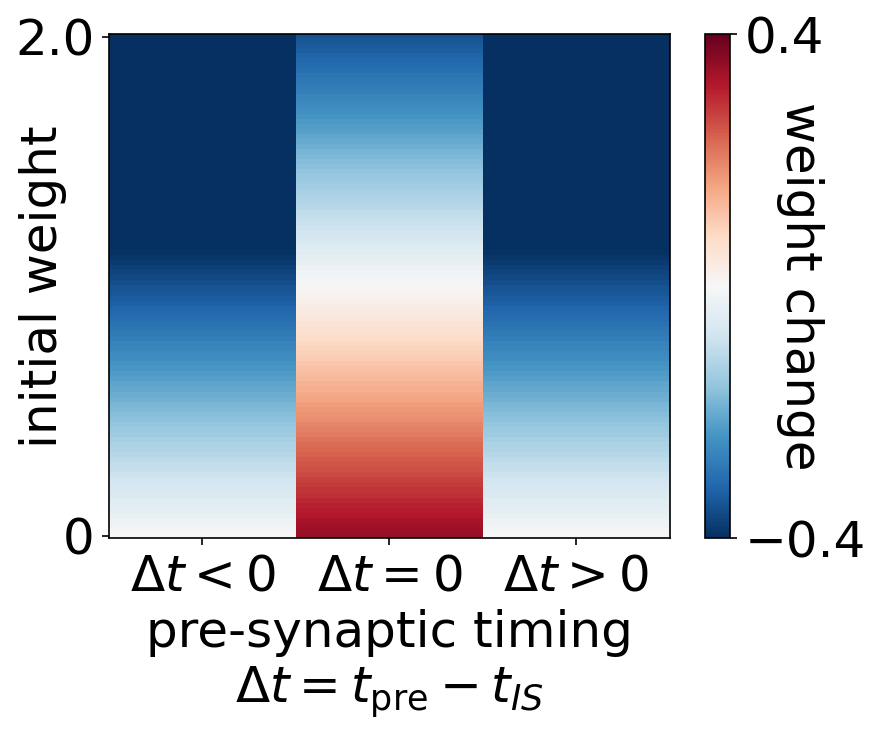

In [205]:
fig_w2, ax_b = plt.subplots(figsize=(6, 5), dpi=150)

cax_b = ax_b.imshow(values, aspect="auto", interpolation="nearest",
               cmap="RdBu_r", vmin=-0.4, vmax=0.4)

# colorbar
cbar = fig_w2.colorbar(cax_b, ax=ax_b, ticks=[-0.4, 0.4])
cbar.set_label("weight change", fontsize=labsize,
              rotation=-90, labelpad=-20)
cbar.ax.tick_params(labelsize=ticksize)

# labels & title
ax_b.set_ylabel("initial weight", fontsize=labsize, labelpad=-25)
ax_b.set_xlabel("pre-synaptic timing\n$\\Delta t = t_{\\text{pre}} - t_{IS}$",
                fontsize=labsize)

# xaxis
ax_b.set_xticks([0, 1, 2])
ax_b.set_xticklabels(["$\\Delta t<0$", "$\\Delta t=0$", "$\\Delta t>0$"],
                     fontsize=ticksize)

# yaxis
ax_b.set_yticks([0, 99])
ax_b.set_yticklabels([max(u), 0],
                     fontsize=ticksize)
#fig_b.suptitle("Magnitude of weight\nchange $\\Delta W$", fontsize=titlesize,
#              fontweight="bold")

plt.tight_layout()
plt.show()

---

In [11]:
# --- load autoencoder
info, autoencoder = models.load_session(
    idx=0, verbose=True)


out_ae, latent_ae = utils.reconstruct_data(
                                data=training_samples,
                                num=num_btsp_samples,
                                model=autoencoder,
                                show=False, 
                                plot=False)

2025-03-31 23:37:18 | Pre-selected session: [0]
2025-03-31 23:37:18 | bias=False
2025-03-31 23:37:18 | info:


{'date': '15/10/2024 15:54:40',
 'epochs': 1000,
 'loss_ae': 0.00051,
 'network_params': {'K_ca1': 25,
                    'K_ca3': 25,
                    'K_ei': 10,
                    'K_eo': 10,
                    'K_lec': 5,
                    'alpha': 0.5,
                    'beta_ca1': 150,
                    'beta_ca3': 150,
                    'beta_ei': 150,
                    'beta_eo': 150,
                    'bias': False,
                    'dim_ca1': 1000,
                    'dim_ca3': 1000,
                    'dim_ei': 100,
                    'dim_eo': 100,
                    'dim_lec': 50,
                    'dim_mec': 50,
                    'mec_N_x': 50,
                    'mec_N_y': 1,
                    'mec_sigma': 4,
                    'num_cues': 2},
 'num_stimuli': 1000}


NameError: name 'training_samples' is not defined

In [139]:
""" with `weight_only=True` """

np.random.seed(0)

results = utils.train_for_reconstruction(alpha=0.3, num_samples=5, verbose=False, bias=True, use_lec=True, idx=4)

""" plot """
fig2, (ax12, ax22, ax32) = plt.subplots(3, 1,
                                figsize=(10, 6), sharex=True)

plt.subplots_adjust(hspace=0.3)

is_squash = False

utils.plot_squashed_data(data=results["data"],
                         ax=ax12,
                         title="Patterns",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl_rnd"], ax=ax32,
                         title=f"shuffled $IS$ - " + \
                f"reconstruction loss={results['rec_loss_rnd']:.3f}",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl"], ax=ax22,
                         title=f"$IS$ - " + \
                f"reconstruction loss={results['rec_loss']:.3f}",
                         proper_title=True)

plt.show()

2025-04-01 23:38:29 | using LEC data
2025-04-01 23:38:29 | bias not found in the info file, set to True
2025-04-01 23:38:29 | bias=True


ValueError: network_params not found in the info file

---
**space-sensory input pattern**

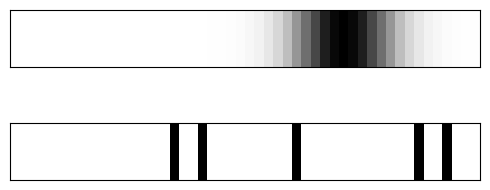

In [56]:
""" data """
n = 50
x = np.zeros(n)
for i in range(n):
    x[i] = np.exp(-((i-35) / (2*3))**2)

y = np.zeros(n)
y[np.random.choice(list(range(50)), size=5, replace=False)] = 1

""" plot """
fontsize=20

fig_w4, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 2))
fig_w4.set_tight_layout({'h_pad': 4})
ax1.imshow(x.reshape(1, -1), cmap="Greys", aspect="auto", interpolation="nearest")
ax1.set_xticks(())
ax1.set_yticks(())
#ax1.set_title("spatial", fontsize=fontsize)

ax2.imshow(y.reshape(1, -1), cmap="Greys", aspect="auto", interpolation="nearest")
ax2.set_xticks(())
ax2.set_yticks(())
#ax2.set_title("sensory", fontsize=fontsize)

plt.show()

## BTSP weight plot
---

**IS present, ET present** : $\Delta W = 1 - \alpha W$

**IS present, ET absent** : $\Delta W = - \alpha W$

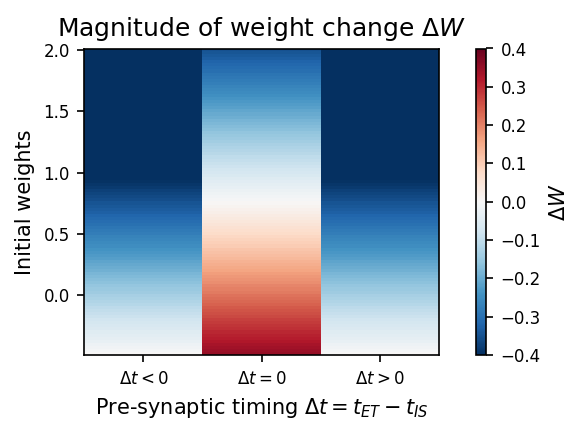

In [151]:
n = 100
alpha = 0.35
values = np.zeros((n, 3))

u = np.linspace(0, 2., n)
values[:, 1] = alpha * (1 - u)
values[:, 0] = - alpha * u
values[:, 2] = - alpha * u


values = np.flip(values, axis=0)

""" plot """
fig_b, ax = plt.subplots(figsize=(4, 3), dpi=150)

im = ax.imshow(values, aspect="auto", interpolation="nearest",
               cmap="RdBu_r", vmin=-0.4, vmax=0.4)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["$\\Delta t<0$", "$\\Delta t=0$", "$\\Delta t>0$"], fontsize=8)
ax.set_yticks(range(0, n, 20))
ax.set_yticklabels(np.around(np.linspace(max(u), 0, len(range(0, n, 20))), 1), fontsize=8)

ax.set_ylabel("Initial weights", fontsize=10)
ax.set_xlabel("Pre-synaptic timing $\\Delta t = t_{ET} - t_{IS}$", fontsize=10)

cbar = fig_b.colorbar(im, ax=ax, aspect=30, pad=0.08)
cbar.set_label("$\Delta W$", fontsize=10)
cbar.ax.tick_params(labelsize=8)

ax.set_title("Magnitude of weight change $\\Delta W$", fontsize=12)

plt.tight_layout()
plt.show()

---

## final: d, f

In [145]:
""" settings """
labsize = 24
titlesize = 34
ticksize = 24

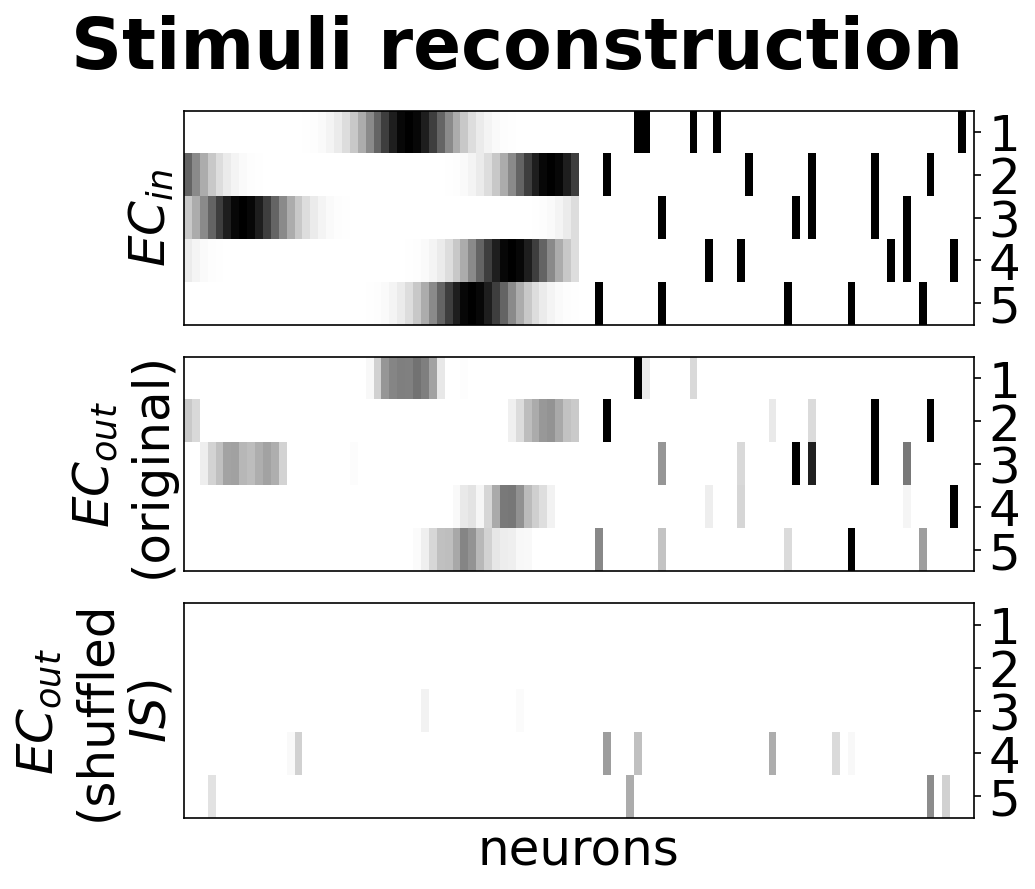

In [148]:
fig_d, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 6), sharex=True, dpi=150)
plt.subplots_adjust(hspace=0.3)

# Plot for Patterns
plot_squashed_data(data=results["data"], ax=ax1, title="$EC_{{in}}$",
                         proper_title=False)


# Plot for IS
plot_squashed_data(data=results["out_mtl"], ax=ax2,
                         title="$EC_{{out}}$ \n(original)",
                         proper_title=False)

# Plot for shuffled IS
plot_squashed_data(data=results["out_mtl_rnd"], ax=ax3,
                         title="$EC_{out}$\n(shuffled\n$IS$)",
                         proper_title=False)

# Adjust font sizes
for ax in (ax1, ax2, ax3):
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    #ax.tick_params(axis='both', which='minor', labelsize=20)

# Add a common x-label
#fig_d.text(0.5, 0.0, 'neurons', ha='center', fontsize=15)

# labels & title
fig_d.suptitle("Stimuli reconstruction", fontsize=titlesize, fontweight="bold")
ax3.set_xlabel("neurons", fontsize=labsize)

plt.tight_layout()
plt.show()

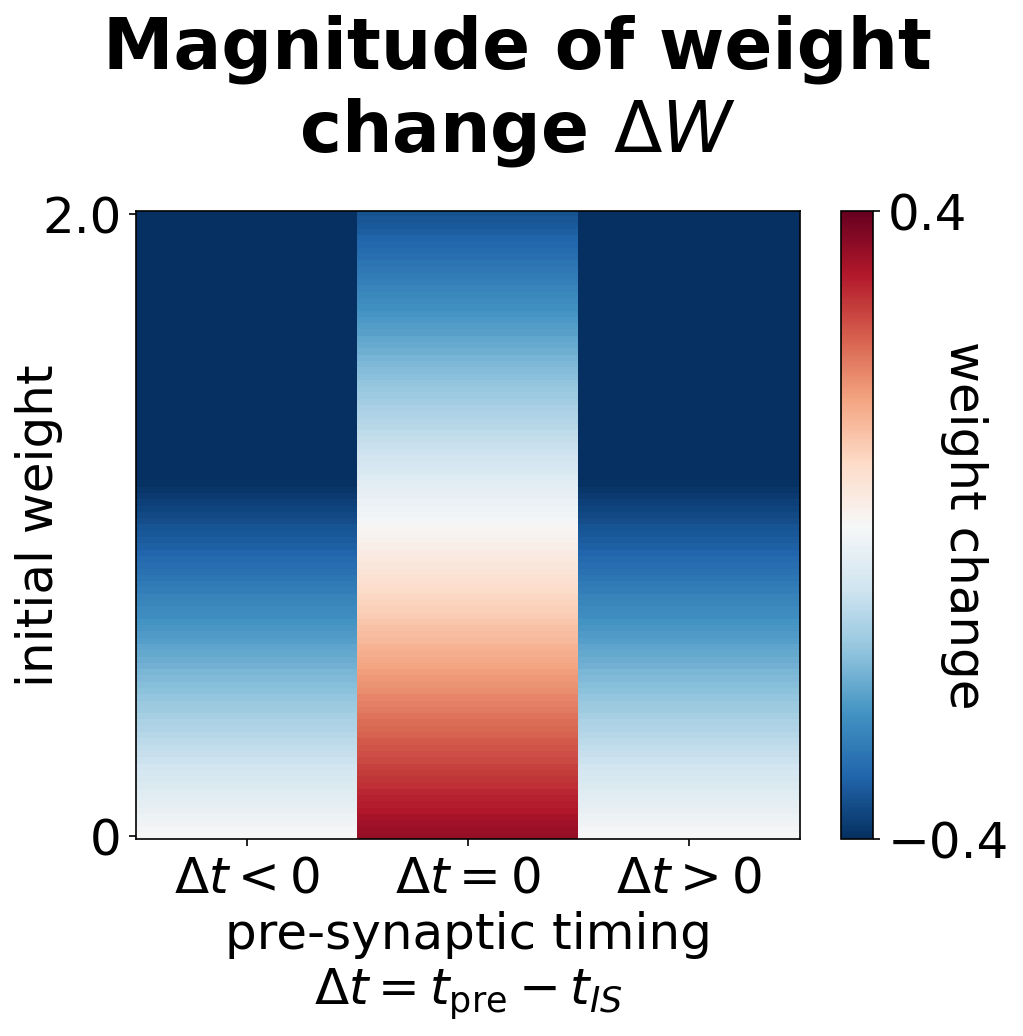

In [153]:
fig_b, ax_b = plt.subplots(figsize=(7, 7), dpi=150)

cax_b = ax_b.imshow(values, aspect="auto", interpolation="nearest",
               cmap="RdBu_r", vmin=-0.4, vmax=0.4)

# colorbar
cbar = fig_b.colorbar(cax_b, ax=ax_b, ticks=[-0.4, 0.4])
cbar.set_label("weight change", fontsize=labsize,
              rotation=-90, labelpad=-10)
cbar.ax.tick_params(labelsize=ticksize)

# labels & title
ax_b.set_ylabel("initial weight", fontsize=labsize, labelpad=-10)
ax_b.set_xlabel("pre-synaptic timing\n$\\Delta t = t_{\\text{pre}} - t_{IS}$",
                fontsize=labsize)

# xaxis
ax_b.set_xticks([0, 1, 2])
ax_b.set_xticklabels(["$\\Delta t<0$", "$\\Delta t=0$", "$\\Delta t>0$"],
                     fontsize=ticksize)

# yaxis
ax_b.set_yticks([0, 99])
ax_b.set_yticklabels([max(u), 0],
                     fontsize=ticksize)
fig_b.suptitle("Magnitude of weight\nchange $\\Delta W$", fontsize=titlesize,
              fontweight="bold")

plt.tight_layout()
plt.show()

---
blank, for title

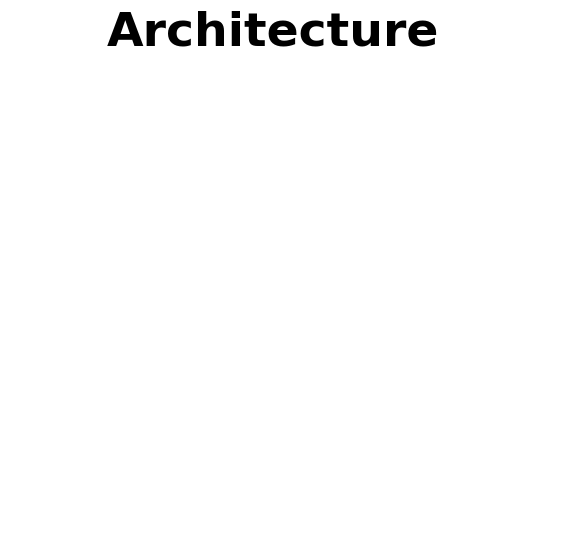

2024-10-15 21:21:18 | saved


In [237]:
fig_a, ax = plt.subplots(figsize=(7, 6))

fig_a.suptitle("Architecture", fontsize=34, fontweight="bold")
ax.axis("off")
plt.show()


fig_a.savefig(f"{utils.MEDIA_PATH}/figure_a_title.svg")
logger("saved")

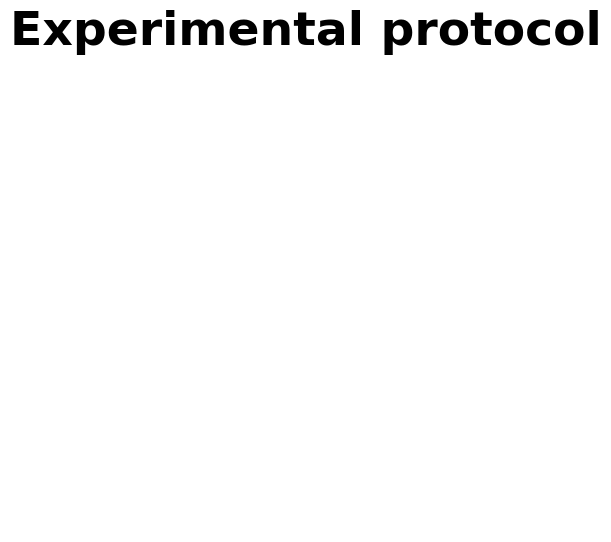

2024-10-15 21:21:19 | saved


In [238]:
fig_c, ax = plt.subplots(figsize=(7, 6))

fig_c.suptitle("Experimental protocol", fontsize=34, fontweight="bold")
ax.axis("off")
plt.show()


fig_c.savefig(f"{utils.MEDIA_PATH}/figure_c_title.svg")
logger("saved")

---
### Save figure

In [263]:
fig_b.savefig(f"{utils.MEDIA_PATH}/figure_b2.svg")
logger("saved")

2024-10-15 21:53:42 | saved


In [261]:
fig_d.savefig(f"{utils.MEDIA_PATH}/figure_d2.svg")
logger("saved")

2024-10-15 21:27:31 | saved
